In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [3]:
dataset.shape

(400, 3)

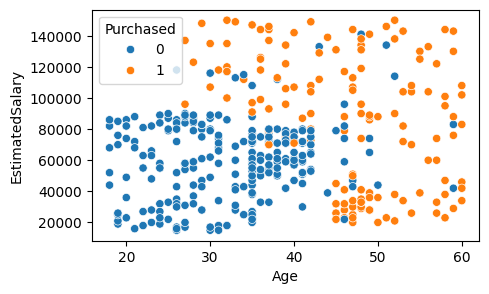

In [4]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [5]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
sc.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [8]:
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [10]:
x_train.shape

(320, 2)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
dt.score(x_test,y_test)*100, dt.score(x_train,y_train)*100

(83.75, 99.6875)

C:\Users\Ramay Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


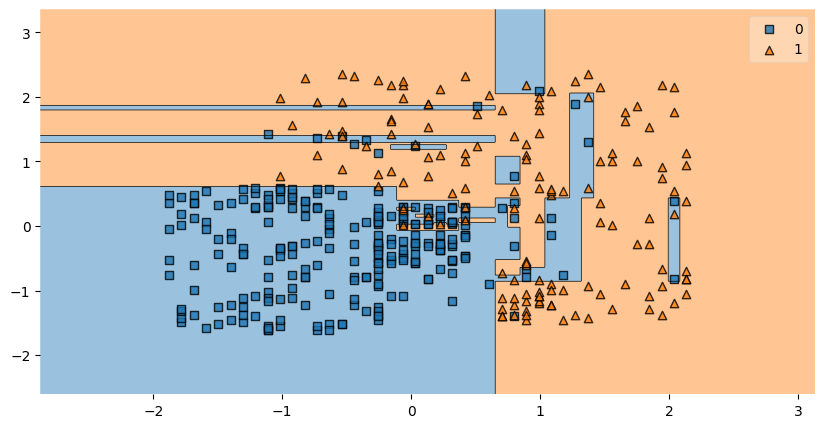

In [14]:
plt.figure(figsize=(10,5))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

In [15]:
from sklearn.tree import plot_tree

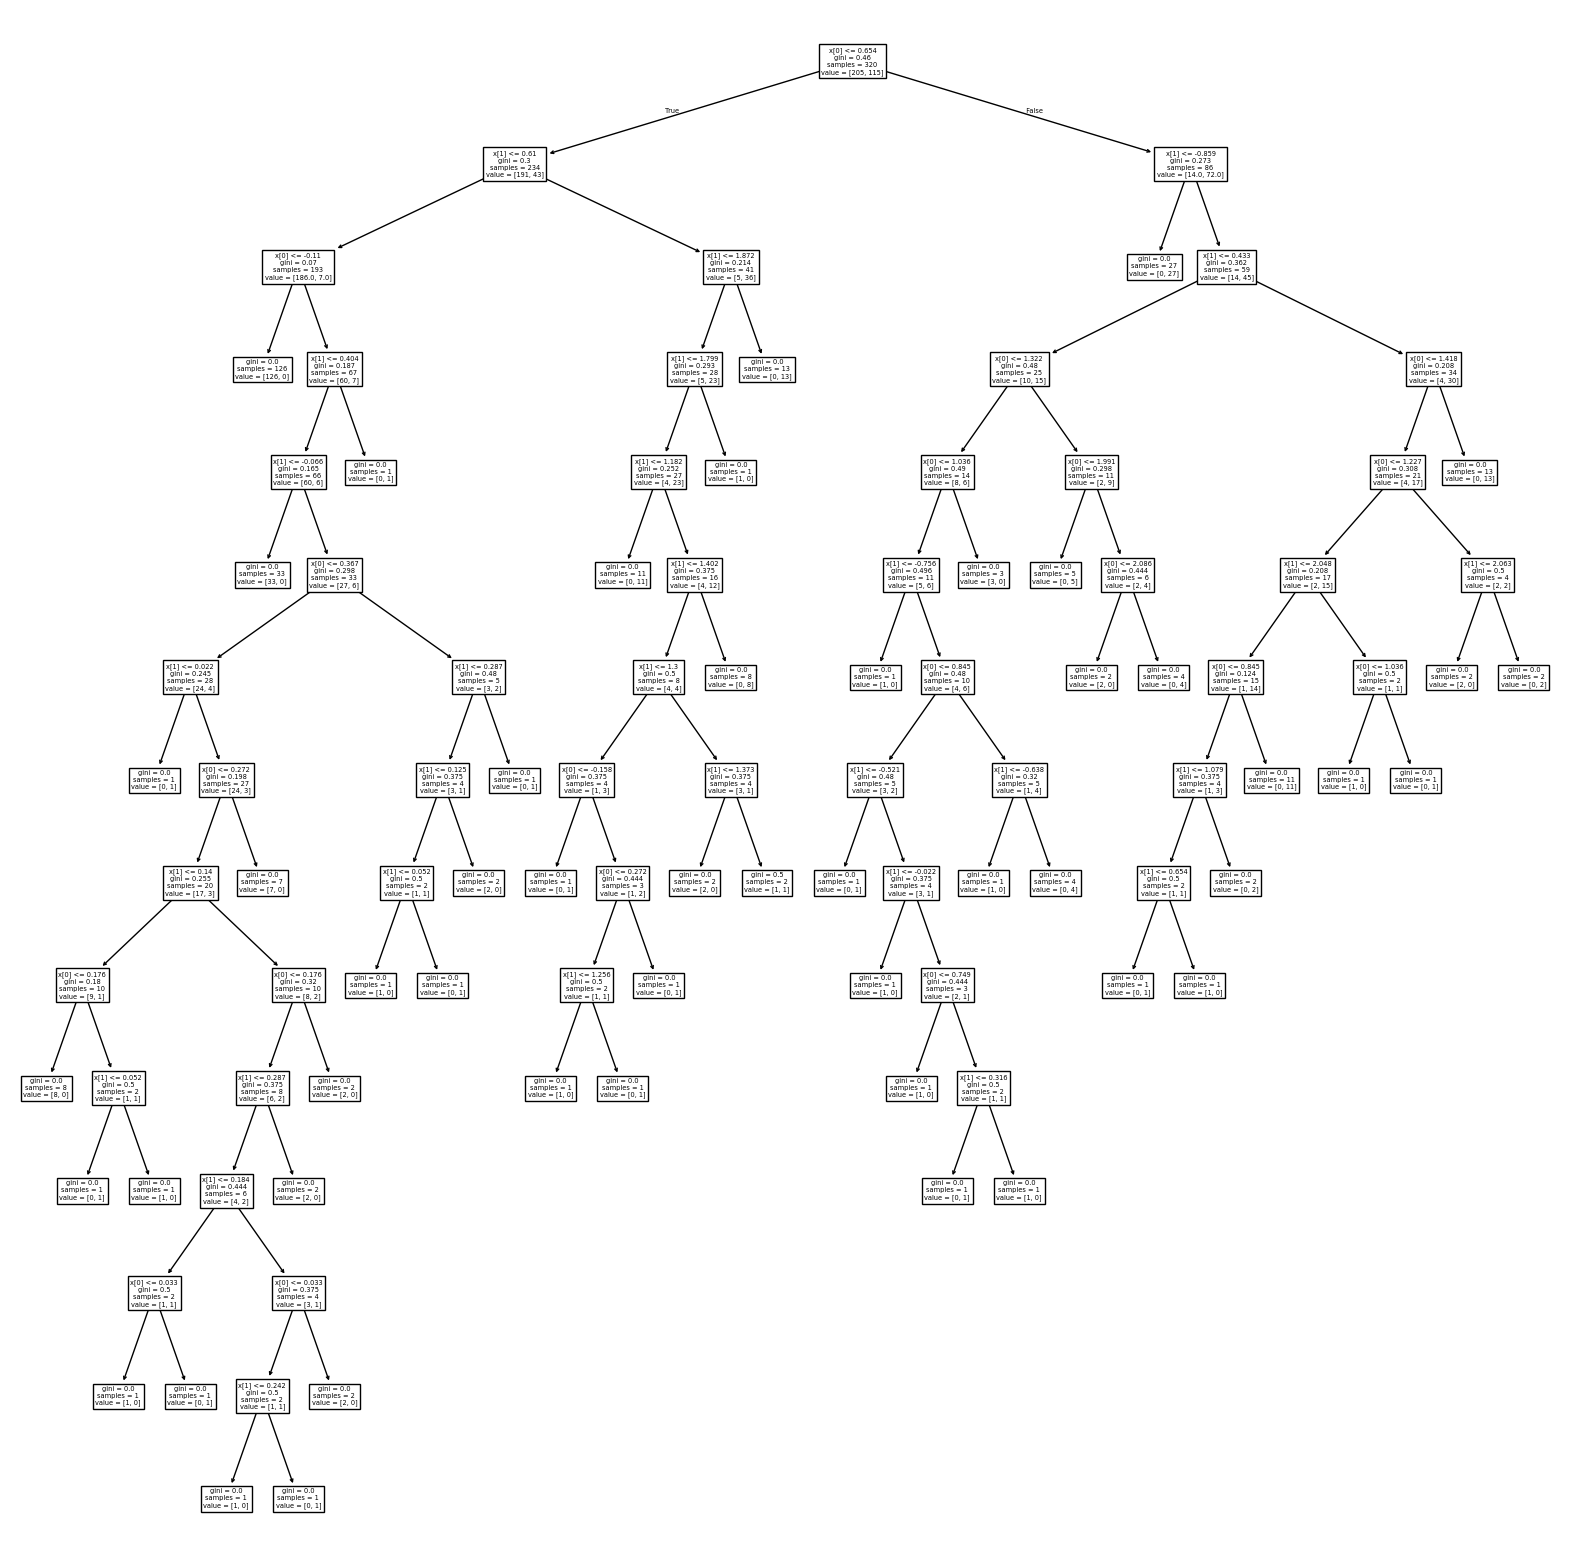

In [16]:
plt.figure(figsize=(20,20))
plot_tree(dt)
# plt.savefig("demo.jpg")
plt.show()

# Pre Pruning

In [18]:
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
dt1.score(x_test,y_test)*100, dt1.score(x_train,y_train)*100

(90.0, 93.4375)

C:\Users\Ramay Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


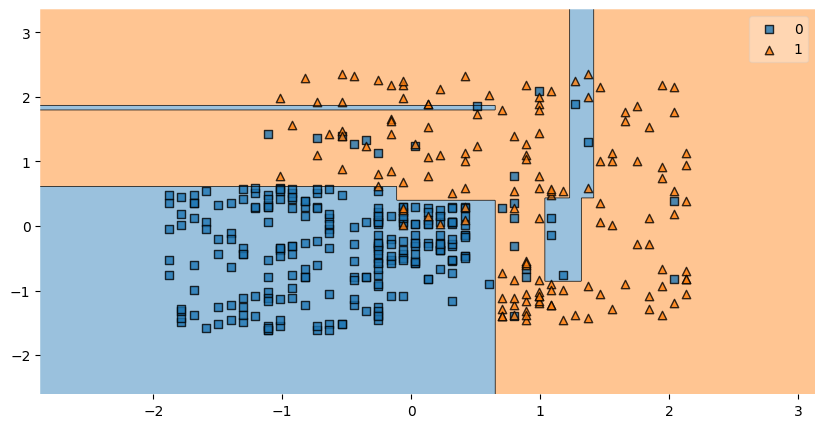

In [21]:
plt.figure(figsize=(10,5))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()

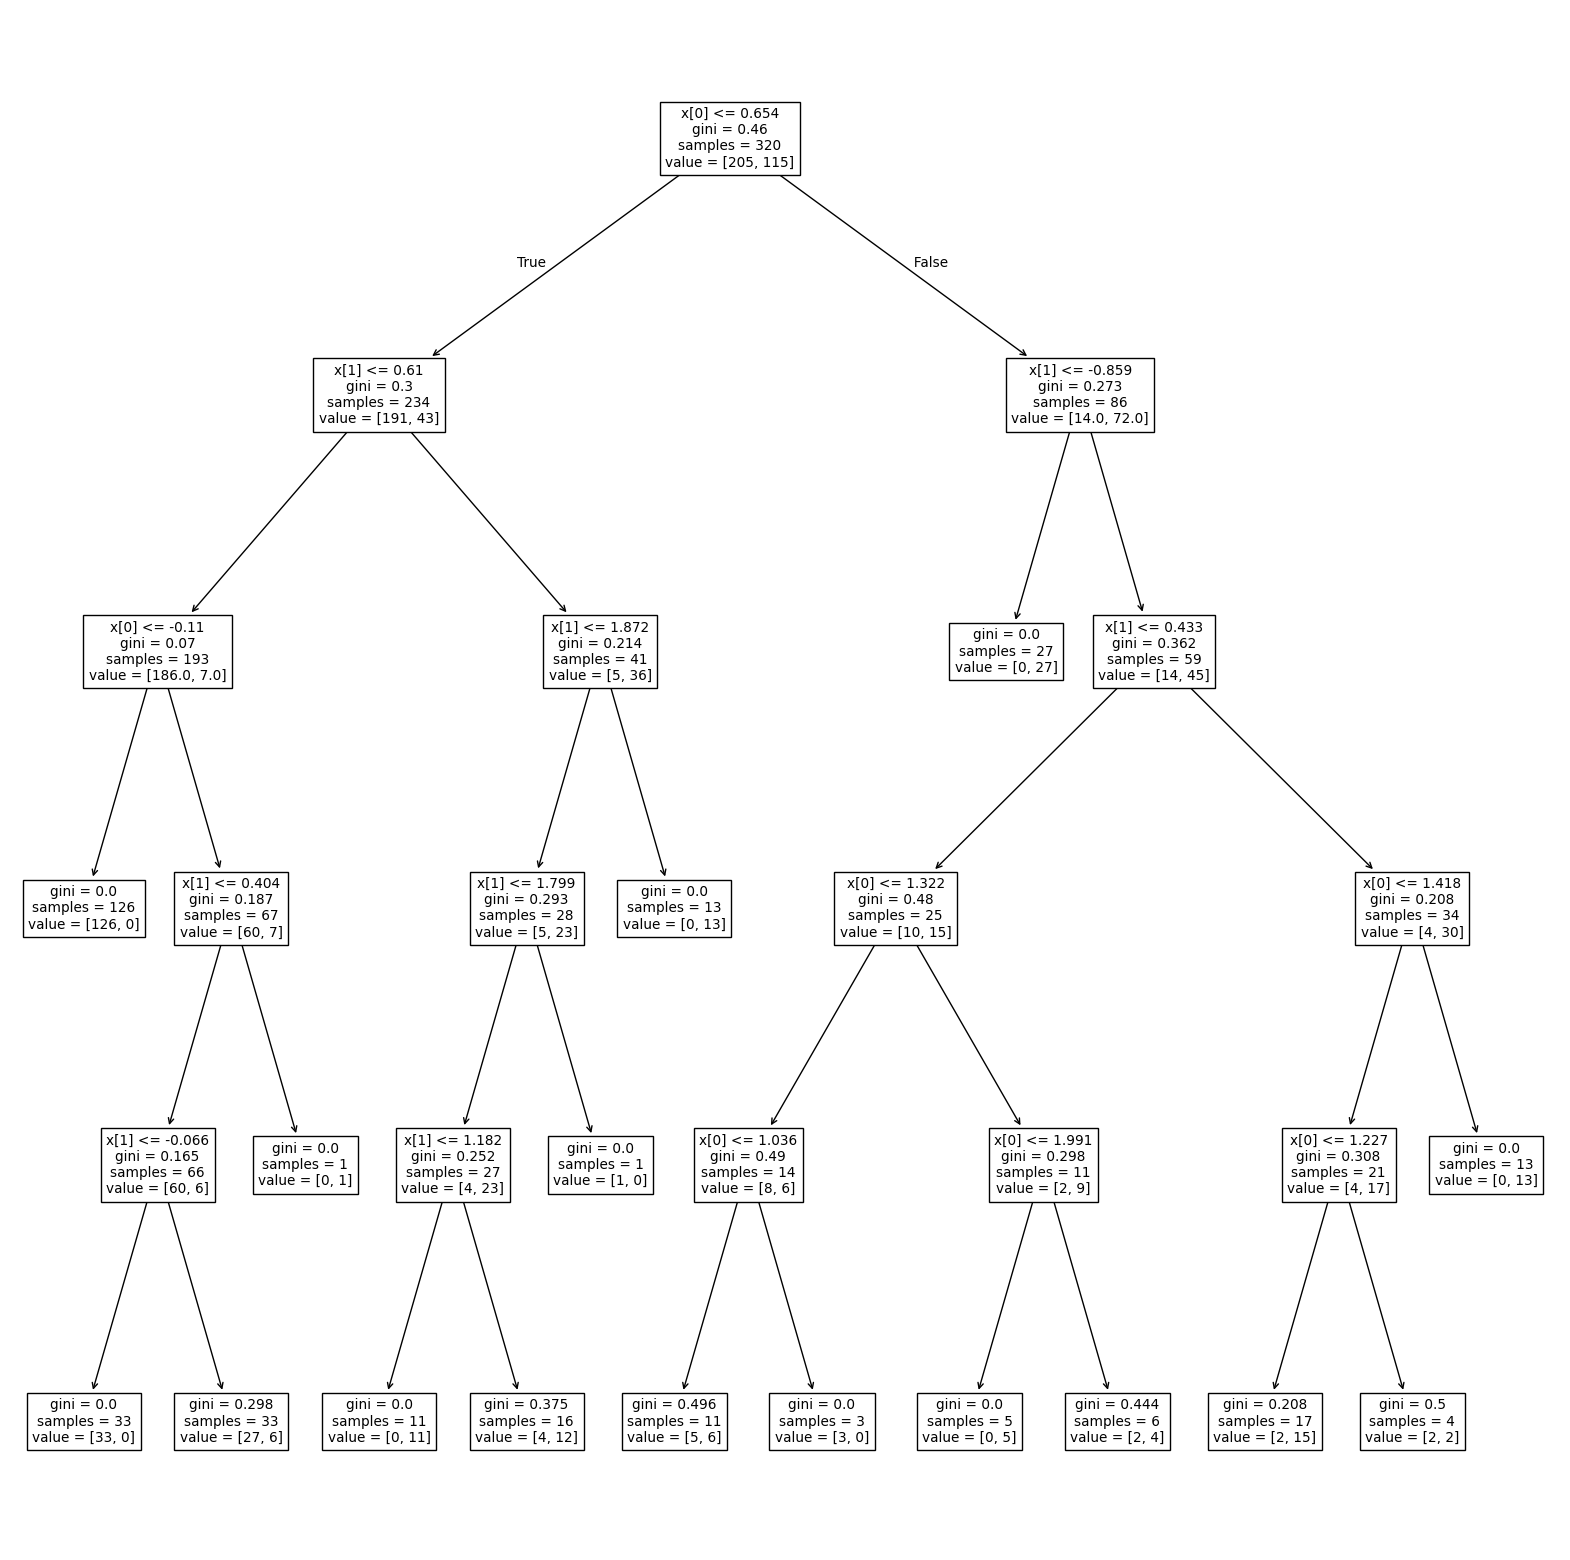

In [22]:
plt.figure(figsize=(20,20))
plot_tree(dt1)
# plt.savefig("demo.jpg")
plt.show()

# Post Pruning

In [23]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)


0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.971875 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.990625 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


In [24]:
dt1 = DecisionTreeClassifier(max_depth=3)
dt1.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
dt1.score(x_test,y_test)*100, dt1.score(x_train,y_train)*100

(91.25, 91.875)

C:\Users\Ramay Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


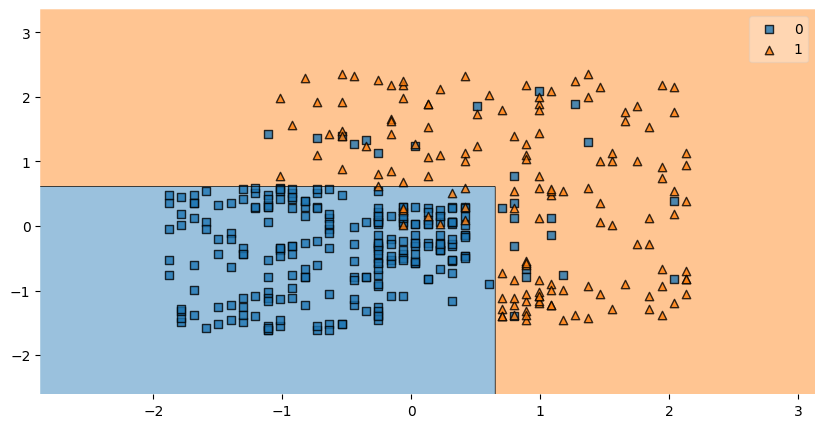

In [26]:
plt.figure(figsize=(10,5))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()

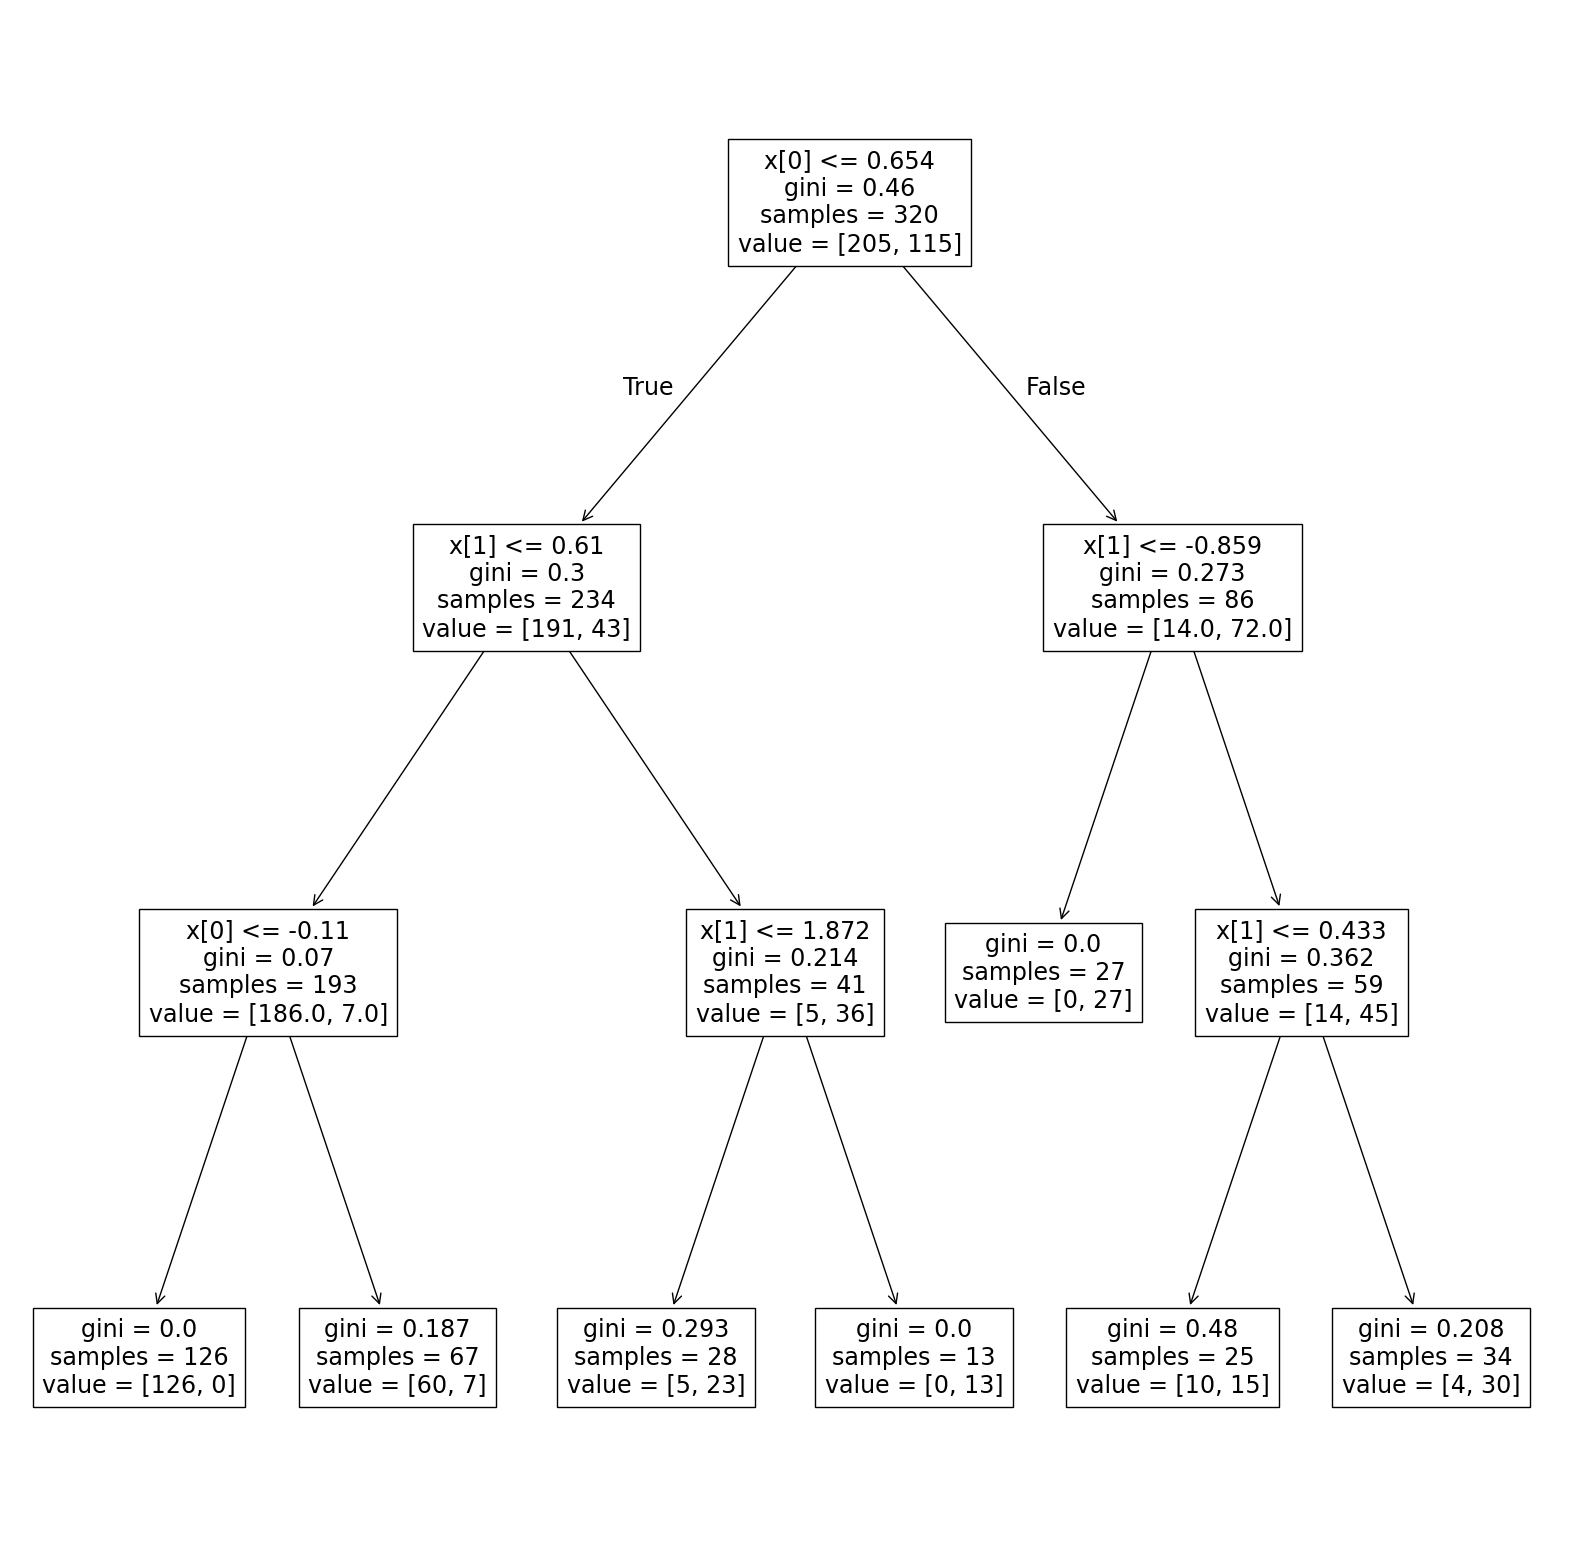

In [27]:
plt.figure(figsize=(20,20))
plot_tree(dt1)
# plt.savefig("demo.jpg")
plt.show()